In [1]:
import os
import numpy as np
import pandas as pd
import random
import math
from datetime import datetime
from math import radians, cos, sin, asin, sqrt
import networkx as nx
import matplotlib.pyplot as plt

/home/uscc/.pyenv/versions/3.6.8/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### 經緯度換算

In [2]:
def haversine(lon1, lat1, lon2, lat2): # 經度1，緯度1，經度2，緯度2 （十進制）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 將十進制轉為弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半徑，單位為公里
    return c * r * 1000

### File Generate

In [3]:
##########edit group size here and day##########
groups = 10
day = 10
################################################

In [4]:
friendship_1 = np.array(pd.read_csv('./dataset_WWW2019/dataset_WWW_friendship_new.txt',header=None,sep='\t'))
friendship_2 = np.array(pd.read_csv('./dataset_WWW2019/dataset_WWW_friendship_old.txt',header=None,sep='\t'))
friendship_all = np.concatenate((friendship_1,friendship_2),axis = 0)

In [5]:
edge_list = []
for i in range(len(friendship_all)):
    edge_list.append([friendship_all[i][0], friendship_all[i][1]])

In [6]:
G = nx.Graph()
# add edge
for i in range(len(edge_list)):
    G.add_edge(edge_list[i][0],edge_list[i][1])

    
print('edge number :',G.number_of_edges(),'\nnode number :',G.number_of_nodes())

edge number : 701317 
node number : 114324


In [7]:
all_edge = list(G.edges)
all_edge.sort()

all_node = list(G.nodes)
all_node.sort()


##### graph.txt
with open('./graph_2.txt','w') as f:
    f.write('{} {},{},{}\n'.format('g',G.number_of_nodes(),G.number_of_edges(),day * groups))
f.close()

#### Node
with open('./graph_2.txt','a') as f:
    for i in all_node:
        node_type = random.randint(0,3)
        R = round(random.uniform(0,1),3)
        Ct = round(random.uniform(0,1),3)
        S = round(random.uniform(0,1),3)
        Cr = round(random.uniform(0,1),3)
        HI = round(random.uniform(0,1),3)
        HA = round(random.uniform(0,1),3)
        HT = round(random.uniform(0,1),3)
        D = round(random.uniform(0,1),3)
        f.write('{} {},{},{},{},{},{},{},{},{},{}\n'.format('n',i , node_type, R, Ct, S, Cr, HI, HA, HT, D))
f.close()

#### Edge.txt
with open('./graph_2.txt','a') as f:
    for i in range(len(all_edge)):
        prob = random.uniform(0,1)
        node1 = all_edge[i][0] 
        node2 = all_edge[i][1]
        f.write('{} {},{},{}\n'.format('e', node1,node2,round(prob,3)))
f.close()


#### Read the checkin data

In [8]:
path = './dataset_WWW2019/dataset_WWW_Checkins_anonymized.txt'

In [9]:
check_in_data = pd.read_csv(path,header=None,sep='\t')
all_id = check_in_data.iloc[:,0]
check_in_id = np.unique(np.array(all_id))
print('check in id number : ',check_in_id.shape)
np.amax(check_in_id)

check in id number :  (114324,)


2199190

#### Read the position data

In [10]:
place_table = pd.read_csv('./dataset_WWW2019/raw_POIs.txt',header=None,sep='\t')
pid_table = place_table.iloc[:,0]

#### Calculate user center

In [11]:
# ## init the dict
# user_center = { i : (0,0) for i in all_node }

# all_placeID = check_in_data.iloc[:,1]

# for _id in check_in_id: 
#     if _id % 1000 == 0:
#         print(_id)
#     _data = all_placeID[all_id == _id]
#     place = _data.iloc[0]
#     _place_data = place_table[pid_table == place]
#     x = round(_place_data.iloc[0,1], 3)
#     y = round(_place_data.iloc[0,2], 3)
#     user_center[_id] = (x,y)

10000
23000
24000
84000
88000
90000
102000
128000
147000
154000
158000
165000
166000
183000
188000
203000
232000
239000
256000
257000
289000
291000
298000
299000
309000
320000
329000
354000
359000
365000
388000
402000
461000
462000
472000
490000
499000
517000
544000
550000
585000
599000
621000
640000
663000
665000
669000
674000
676000
686000
697000
700000
717000
727000
730000
761000
770000
782000
784000
793000
798000
807000
843000
868000
871000
888000
910000
927000
934000
938000
942000
977000
982000
995000
1019000
1077000
1093000
1105000
1109000
1111000
1130000
1158000
1167000
1198000
1226000
1227000
1236000
1256000
1299000
1323000
1331000
1343000
1345000
1387000
1395000
1413000
1423000
1431000
1488000
1502000
1527000
1592000
1624000
1642000
1643000
1657000
1688000
1698000
1700000
1851000
1904000
2059000
2095000


In [12]:
# # save the user center
# with open('./user_center_2.txt' ,'w') as f:
#     for i in all_node:
#         f.write('{},{},{}\n'.format(i,user_center[i][0],user_center[i][1]))
# f.close()

#### Calculate the max radius

In [13]:
user_center_data = pd.read_csv('./user_center_2.txt',header=None,sep=',')
user_x = np.array(user_center_data[:][1])
user_y = np.array(user_center_data[:][2])
#### find the farest x_value on +x axis and -x axis
x_max = np.amax(user_x)
x_min = np.amin(user_x)
#### find the farest y_value on +y axis and -y axis
y_max = np.amax(user_y)
y_min = np.amin(user_y)

length = round(haversine(80,y_max,x_min,y_min),2)
max_radius = round(length/2,2)
print('diagonal length : ',length)
print('max radius : ',max_radius)
print(x_max,y_max,x_min,y_min)

diagonal length :  14847731.57
max radius :  7423865.79
84.074 178.423 -56.493 -159.495


#### user on the graph

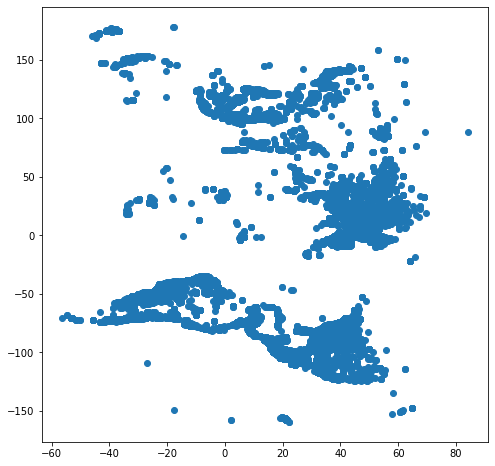

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(user_x,user_y)
plt.show()

#### Select the group

In [16]:
##### group
with open('./graph_2.txt','a') as f:
    for d in range(day):    
        ## random radius by "normal distrubtion"
        radius = np.random.normal(max_radius,scale=1000000,size = groups)
        ## random user be the center
        centers = np.random.randint(0,G.number_of_nodes() - 1,size = groups)
        
        for idx in range(groups):
            # empty set
            sd = set()
            cost = random.randint(1,10)
            lv = random.randint(1,3)
            eta = -1
            # find the user that in the center range
            for i in range(len(all_node)):
                center_x = user_center_data[1][centers[idx]]
                center_y = user_center_data[2][centers[idx]]
                compare_x = user_center_data[1][i]
                compare_y = user_center_data[2][i]
                l = haversine(center_x, center_y ,compare_x,compare_y ) 
                if l <= radius[idx]:
                    sd.add(i)
            f.write('{} {}_{}_{}_{}_{}\n'.format('X', d, cost, lv, eta, ",".join(str(i) for i in sd)))        
f.close() 